# "LAB - 02, Experiment No 3"


# Calculating the baud rate, finding the graph of pamsig201.wav in time domain and frequency domain

In [1]:
%matplotlib inline

In [2]:
# %load to_find_bit_rate.py
from pylab import *
import ascfun as af
import wavfun as wf
f#ilename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("pamsig201.wav")
bits = 8
#n = int(floor(len(rt)/float(fs)/tb)) 	

dn=[]
comp_val = (max(rt) + min(rt))/2.0   # to decide whether the bit is 1 or zero

# making a list of all bits
for j in rt:
	if j > comp_val:
		dn = dn + [1]
	else:
		dn = dn + [0]

# counding the continuous 1s or 0s
k=dn[0] 
n=0  # track the count
lst=[]  # this list will contain the count of continuous 1s or 0s
for i in dn:
	if k == i:
		n=n+1
		continue
	else:
		k=i
		lst = lst + [n]
		n=0
fb=fs/min(lst)
# getting the minimum value of the list and printing it
print("The bit rate is below ")
print(fb)


The bit rate is below 
253.44827586206895


In [3]:
rt, fs = wf.wavread("pamsig201.wav")    # finding the samples and sampling frequency

In [4]:
n=len(rt)      # no. of samples in rt

In [5]:
tlen=(1/fs)*n      # the time interval

In [6]:
tlen,n,fs

(0.6080045351473923, 26813, 44100)

In [7]:
tt = arange(0,tlen,1/fs)         #defining time axis

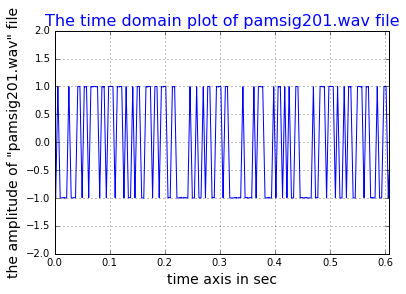

In [8]:
plot(tt,rt)
xlabel('time axis in sec', fontsize=14)
ylabel('the amplitude of "pamsig201.wav" file', fontsize=14)
ylim([-2,2])
xlim([0,tlen])
title('The time domain plot of pamsig201.wav file', fontsize=16, color='b')
grid()

show()

In [9]:
# %load showfun.py
# File: showfun.py
# "show" functions like showft, showpsd, etc
from pylab import *
def showft(tt, xt, ff_lim):
	"""
	Plot (DFT/FFT approximation to) Fourier transform of x(t)
	Displays magnitude |X(f)| either linear and absolute or
	normalized (wrt to maximum value) in dB. Phase of X(f) is
    	shown in degrees.
    	>>>>> showft(tt, xt, ff_lim) <<<<<
    	where tt:time axis (increments Ts=1/Fs) for x(t)
            xt:sampled CT signal x(t))
            ff_lim = [f1,f2,llim]
            f1:lower frequency limit for display
            f2:upper frequency limit for display
            llim = 0: display |X(f)| linear and absolute
            llim > 0: same as llim = 0 but phase is masked
                      (set to zero) for |X(f)| < llim
            llim < 0: display 20*log_{10}(|X(f)|/max(|X(f)|))
                      in dB with lower display limit llim dB,
                      phase is masked (set to zero) for f
                      with magnitude (dB, normalized) < llim
    	"""
	# ***** Prepare x(t), swap pos/neg parts of time axis *****
	n = len(tt)
	fs = int((n-1)/float(tt[-1]-tt[0])) 	# Sampling rate
	ixp = where(tt>=0)[0]			# Indexes for t>=0
	ixn = where(tt<0)[0]			# Indexes for t<0
	tlen = tt[-1]	
	xt = hstack((xt[ixp],xt[ixn])) 		# Swap pos/neg time axis parts
	llim = ff_lim[2]
	f11, f12 = ff_lim[0], ff_lim[1]
	
	
	# ***** Compute X(f), make frequency axis *****
	Xf = fft(xt)/float(fs)			# DFT/FFT of x(t),
	
	# scaled for X(f) approximation
	ff = fs*arange(-round(n/2),round(n/2)+1)/float(n) 		# Frequency axis
	# ***** Compute |X(f)|, arg[X(f)] *****
	absXf = abs(Xf)				# Magnitude |X(f)|
	absXf_pos = absXf[0:round(n/2)+1]
	absXf_neg = array(list(reversed(absXf_pos[1:])))
	absXf = hstack((absXf_neg,absXf_pos))

	argXf = list(angle(Xf))			# Phase arg[X(f)]
	argXf_pos = argXf[0:round(n/2)+1:]
	argXf_neg = argXf[round(n/2)+1:]
	argXf = hstack((array(argXf_neg),array(argXf_pos)))


	if llim < 0:
		absXf = list(20*log10((absXf+1e-20)/max(absXf)))
		ind_absXf = [llim/i if i < llim else i/i if i != 0 else 1.0 for i in list(absXf)]
		ind_argXf = [i*0 if i < llim else i/i if i!=0 else 1.0 for i in list(absXf)]
		absXf = array([a*b for (a,b) in zip(absXf,ind_absXf)])
		argXf = array([a*b for (a,b) in zip(argXf,ind_argXf)])
	else:
		ind_argXf = [i*0 if -llim < i < llim else i/i for i in list(absXf)]
		argXf = array([a*b for (a,b) in zip(argXf,ind_argXf)])

	
	# ***** Plot magnitude/phase *****
	f1 = figure()
	i_start = int(round(n/2)+f11*tlen) 
	i_end = int(round(n/2)+f12*tlen)
	af11 = f1.add_subplot(211)
	af11.plot(ff[i_start:i_end],absXf[i_start:i_end])
	af11.grid()
	if llim >= 0:
		af11.set_ylabel('|X(f)|')
	else:
		af11.set_ylabel('|X(f)| in dB')
	strgt = 'FT Approximation, $F_s=$' + str(fs) + ' Hz'
	strgt = strgt + ', N=' + str(n)
	strgt = strgt + ', $\Delta_f$={0:3.2f}'.format(fs/float(n)) + ' Hz'
	af11.set_title(strgt)
	af12 = f1.add_subplot(212)
	af12.plot(ff[i_start:i_end],180/pi*argXf[i_start:i_end]) 		# Plot phase in degrees
	af12.grid()
	af12.set_ylabel('arg[X(f)] [deg]')
	af12.set_xlabel('f [Hz]')
	show()


In [10]:
%run showfun.py

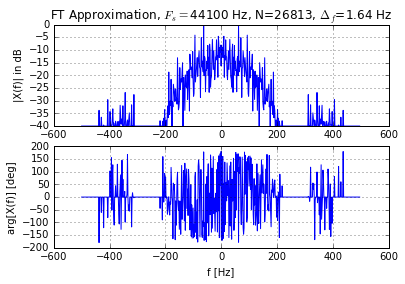

In [11]:
showft(tt,rt,[-500,500,-40])   # the frequency range is from -500 Hz to 500 Hz, rt and tt are extracted in the upper part

In [17]:

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
#fb = input("Enter the baud rate: ")
#off = input("Enter the offset value (max should be less than or equal to number of users multiples)")

rt, fs = wf.wavread("pamsig201.wav")
fb = 251
tb = 1/float(fb)
bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits
rt = list(rt)  	# changing rt into list type

######### getting sample of rt signal #######
dnhat=[]
for i in range(n):
	d_prime = rt[int(i*round(fs*tb)):int(((i+1))*round(fs*tb))]
	avg =   sum(d_prime) / round(fs*tb)
	if avg > 0:
		dnhat = dnhat + [1]
	else:
		dnhat = dnhat + [0]

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")


The content of the wav file is "Blowing in the wind"



# For file pamsig201.wav, We found the baud rate equal to 251 Hz (approximately) and the hidden messgae was "Blowing in the wind".  Also the type of pulse using is "triangular".

#  Calculating the baud rate, finding the graph of 2nd file pamsig202.wav in time domain and frequency domain

In [13]:
# %load to_find_bit_rate.py
from pylab import *
import ascfun as af
import wavfun as wf
f#ilename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("pamsig202.wav")
bits = 8
#n = int(floor(len(rt)/float(fs)/tb)) 	

dn=[]
comp_val = (max(rt) + min(rt))/2.0   # to decide whether the bit is 1 or zero

# making a list of all bits
for j in rt:
	if j > comp_val:
		dn = dn + [1]
	else:
		dn = dn + [0]

# counding the continuous 1s or 0s
k=dn[0] 
n=0  # track the count
lst=[]  # this list will contain the count of continuous 1s or 0s
for i in dn:
	if k == i:
		n=n+1
		continue
	else:
		k=i
		lst = lst + [n]
		n=0
fb=fs/min(lst)
# getting the minimum value of the list and printing it
print("The bit rate is below ")
print(fb)


The bit rate is below 
201.36986301369862


In [14]:
rt, fs = wf.wavread("pamsig202.wav")    # finding the samples and sampling frequency

In [15]:
n=len(rt)      # no. of samples in rt

In [16]:
tlen=(1/fs)*n      # the time interval

In [17]:
tt = arange(0,tlen,1/fs)         #defining time axis

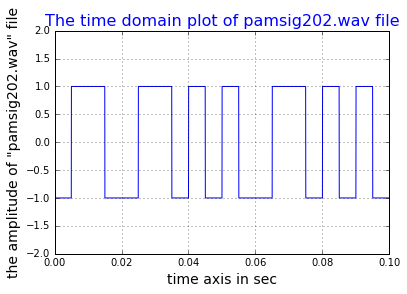

In [18]:
plot(tt,rt)
xlabel('time axis in sec', fontsize=14)
ylabel('the amplitude of "pamsig202.wav" file', fontsize=14)
ylim([-2,2])
xlim([0,0.1])
title('The time domain plot of pamsig202.wav file', fontsize=16, color='b')
grid()

show()

In [19]:
%run showfun.py

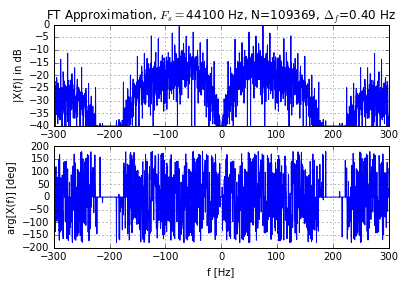

In [20]:
showft(tt,rt,[-300,300,-40])   # the frequency range is from -300 Hz to 300 Hz, rt and tt are extracted in the upper part

In [21]:

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
#fb = input("Enter the baud rate: ")
#off = input("Enter the offset value (max should be less than or equal to number of users multiples)")

rt, fs = wf.wavread("pamsig202.wav")
fb=100
tb = 1/float(fb)
bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits
# changing rt into list type

######### getting sample of rt signal #######
offset = floor(tb/2*fs)
dnhat = [0]*n # Initializing the array to zeros
for i in arange(n):
    sp = int(offset+2+i*fs*tb)
    dnhat[i] = int(rt[sp]>0.0)

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")



The content of the wav file is "Ethernet uses Manchester pulses"



# We found the baud rate equal to 100 Hz (approximately) and the hidden messgae was "Ethernet uses Manchester pulses".  Also the type of pulse using is "Manchester Pulse".

#  Calculating the baud rate, finding the graph of 3rd file pamsig203.wav in time domain and frequency domain

In [1]:
# %load to_find_bit_rate.py
from pylab import *
import ascfun as af
import wavfun as wf
f#ilename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("pamsig203.wav")
bits = 8
#n = int(floor(len(rt)/float(fs)/tb)) 	

dn=[]
comp_val = (max(rt) + min(rt))/2.0   # to decide whether the bit is 1 or zero

# making a list of all bits
for j in rt:
	if j > comp_val:
		dn = dn + [1]
	else:
		dn = dn + [0]

# counding the continuous 1s or 0s
k=dn[0] 
n=0  # track the count
lst=[]  # this list will contain the count of continuous 1s or 0s
for i in dn:
	if k == i:
		n=n+1
		continue
	else:
		k=i
		lst = lst + [n]
		n=0
fb=fs/min(lst)
# getting the minimum value of the list and printing it
print("The bit rate is below ")
print(fb)


The bit rate is below 
490.0


In [2]:
rt, fs = wf.wavread("pamsig203.wav")    # finding the samples and sampling frequency

In [3]:
n=len(rt)      # no. of samples in rt

In [10]:
tlen=(1/fs)*n      # the time interval


0.002

In [11]:
sum(list(rt))/n

-3.343256950378418

In [5]:
tt = arange(0,tlen,1/fs)         #defining time axis

In [9]:
stem(tt,rt)
xlabel('time axis in sec', fontsize=14)
ylabel('the amplitude of "pamsig203.wav" file', fontsize=14)
ylim([-2,2])
xlim([0,0.3])
title('The time domain plot of pamsig203.wav file', fontsize=16, color='b')
grid()

show()

In [28]:
%run showfun.py

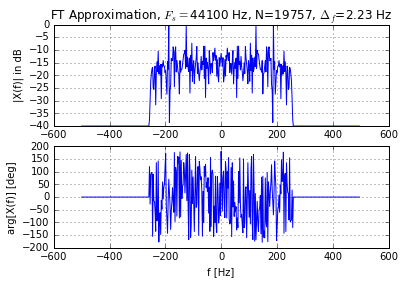

In [29]:
showft(tt,rt,[-500,500,-40])   # the frequency range is from -1000 Hz to 1000 Hz, rt and tt are extracted in the upper part

In [74]:

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
#fb = input("Enter the baud rate: ")
#off = input("Enter the offset value (max should be less than or equal to number of users multiples)")

rt, fs = wf.wavread("pamsig203.wav")
fb=500
tb = 1/float(fb)
bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

# changing rt into list type
rt = list(rt)  	# changing rt into list type


######### getting sample of rt signal #######
dnhat=[]
for i in range(n):
	d_prime = rt[int(i*round(fs*tb)) + int(0.5*fs*tb):int(((i+1))*round(fs*tb))]
	avg =   sum(d_prime) / 0.5*round(fs*tb)  
	if avg > 0:
		dnhat = dnhat + [1]
	else:
		dnhat = dnhat + [0]

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")



The content of the wav file is "'My life as an online gamer'"



# We found the baud rate equal to 500 Hz (approximately) and the hidden messgae was " 'My life as an online gamer' ".  Also the type of pulse using is "sinc".

# Part (b)

In [31]:
# %load to_find_bit_rate.py
from pylab import *
import ascfun as af
import wavfun as wf
f#ilename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("pamsig204.wav")
bits = 8
#n = int(floor(len(rt)/float(fs)/tb)) 	

dn=[]
comp_val = (max(rt) + min(rt))/2.0   # to decide whether the bit is 1 or zero

# making a list of all bits
for j in rt:
	if j > comp_val:
		dn = dn + [1]
	else:
		dn = dn + [0]

# counding the continuous 1s or 0s
k=dn[0] 
n=0  # track the count
lst=[]  # this list will contain the count of continuous 1s or 0s
for i in dn:
	if k == i:
		n=n+1
		continue
	else:
		k=i
		lst = lst + [n]
		n=0
fb=fs/min(lst)
# getting the minimum value of the list and printing it
print("The bit rate is below ")
print(fb)


The bit rate is below 
201.36986301369862


# This is the baud rate for the whole signal. For each user, it will be approximately equal to 100 Hz.

# Below is the code which will decode any n user (equal baud rate) TDM muliplexed signal.

In [32]:
# %load find_content_of_file.py
# "off" parameter will decide which user's message you want to decode


from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
#fb = input("Enter the baud rate: ")
#off = input("Enter the user number to get it's data [0/1] (in this case it's two user) : ")
#off = input("Enter the offset value (max should be less than or equal to number of users multiples)")

rt, fs = wf.wavread("pamsig204.wav")
fb=200
tb = 1/float(fb)
bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits
off = 0    # it will decide which user's message you want to decode
nu = 2    # number of user multiplexed
rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

dn_prime=[]
for j in range(int(n/nu)):
	dn_prime = dn_prime + [rt[int((nu*j+0.5)*fs*tb)  + int(off*fs*tb)]]

dnhat = [1 if i > 0 else 0 for i in dn_prime]
#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")



The content of the wav file is "Shepherd David "



In [33]:
# %load find_content_of_file.py
# "off" parameter will decide which user's message you want to decode

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
#fb = input("Enter the baud rate: ")
#off = input("Enter the user number to get it's data [0/1] (in this case it's two user) : ")
#off = input("Enter the offset value (max should be less than or equal to number of users multiples)")

rt, fs = wf.wavread("pamsig204.wav")
fb=200
tb = 1/float(fb)
bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits
off = 1
nu = 2    # number of user multiplexed
rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

dn_prime=[]
for j in range(int(n/nu)):
	dn_prime = dn_prime + [rt[int((nu*j+0.5)*fs*tb)  + int(off*fs*tb)]]

dnhat = [1 if i > 0 else 0 for i in dn_prime]
#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")



The content of the wav file is "Warrior Goliath"



# From the above running of the code, I found the hidden message for both the users. For user0, the message is "Shepherd David" and the message for user1 is "Warrior Goliath"